# Some preparing

In [7]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./jobs.csv')

In [10]:
df.head()

,title,money,knoladge,company,addition,city,link
0,Python разработчик (Middle),200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,Технопарк «Сколково»,['Удаленная работа'],Москва,https://russia.superjob.ru/vacancy/search/?key...
1,Python-разработчик с функционалом data-аналитика,NaN,PYTHON DJANGO,Friendwork,NaN,Москва,https://russia.superjob.ru/vacancy/search/?key...
2,Разработчик Python,180.0,PYTHON DRF FASTAPI CELERY,Ботобот,['Удаленная работа'],Москва,https://russia.superjob.ru/vacancy/search/?key...
3,Программист Python,NaN,LINUX CENTOS OPENSUSE,"ФГБУ ""Научно-исследовательский центр космическ...",['Доступно студентам'],Москва,https://russia.superjob.ru/vacancy/search/?key...
4,Педагог дополнительного образования (программи...,18.0,NaN,ТЕХНОШКОЛА,['Доступно студентам'],Домодедово,https://russia.superjob.ru/vacancy/search/?key...


In [8]:
len(df[df.money > 0]), len(df)

(84, 141)

In [17]:
print ('companies count:', df.company.unique().shape) # it is too much
print ('city count:', df.city.unique().shape) # it is perfect

companies count: (77,)
city count: (26,)


In [20]:
df[df.money > 0].isnull().sum()

title        0
money        0
knoladge     5
company      2
addition    47
city         0
link         0
dtype: int64

# Work begins here

In [27]:
for_work = df.drop(['company', 'link', 'title'], axis=1)

In [28]:
for_work

,money,knoladge,addition,city
0,200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,['Удаленная работа'],Москва
1,NaN,PYTHON DJANGO,NaN,Москва
2,180.0,PYTHON DRF FASTAPI CELERY,['Удаленная работа'],Москва
3,NaN,LINUX CENTOS OPENSUSE,['Доступно студентам'],Москва
4,18.0,NaN,['Доступно студентам'],Домодедово
...,...,...,...,...
136,NaN,NET HTML JAVASCRIPT ASP NET,['Удаленная работа'],Москва
137,NaN,GEMS DEVELOPMENT NPM YARN NUGET JAVASCRIPT ANG...,NaN,Омск
138,NaN,ANGULAR JS TYPESCRIPT POSTGRESQL SEQUELIZE EXP...,['Удаленная работа'],Москва
139,40.0,WINDOWS SERVER CENTOS POSTRESQL NODE JS NGINX ...,NaN,Сыктывкар


In [31]:
will_use = pd.get_dummies(for_work)

In [32]:
from sklearn.model_selection import train_test_split

In [40]:
test = will_use[will_use.money < 1]
X_train, X_test, y_train, y_test = train_test_split(will_use[will_use.money > 0].drop(['money'], axis=1), will_use[will_use.money > 0].money, test_size=0.3, random_state=17)

## Make a model

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [132]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

1498.2992861087125

In [139]:
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
will_use = will_use.drop(feature_imp[feature_imp == 0].index, axis=1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(will_use[will_use.money > 0].drop(['money'], axis=1), will_use[will_use.money > 0].money, test_size=0.3, random_state=17)

In [141]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

1509.0375681830847

In [142]:
for_work.head(5)

,money,knoladge,addition,city
0,200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,['Удаленная работа'],Москва
1,NaN,PYTHON DJANGO,NaN,Москва
2,180.0,PYTHON DRF FASTAPI CELERY,['Удаленная работа'],Москва
3,NaN,LINUX CENTOS OPENSUSE,['Доступно студентам'],Москва
4,18.0,NaN,['Доступно студентам'],Домодедово


In [143]:
model.predict(will_use.drop('money', axis=1).head(5))

array([181.958 , 110.791 , 170.508 , 122.902 ,  27.8065])

In [144]:
will_use.money.describe()

count     84.000000
mean      88.750000
std       60.097887
min       15.000000
25%       40.000000
50%       75.000000
75%      120.000000
max      280.000000
Name: money, dtype: float64

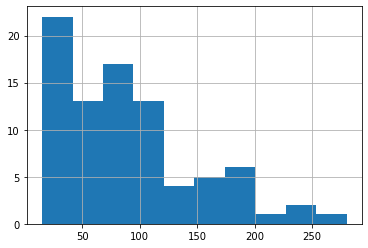

In [145]:
will_use.money.hist();

# Save a model

In [146]:
import joblib

In [147]:
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [148]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.3836807735718242
